In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
sns.set_style('darkgrid')
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
plt.rc('figure',figsize=(10,6))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/xingyu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pos_train_data_file = '../data/twitter-datasets/train_pos_full.txt'
neg_train_data_file = '../data/twitter-datasets/train_neg_full.txt'
test_data_file = '../data/twitter-datasets/test_data.txt'

In [3]:
# read data
pos_train_data = []
with open(pos_train_data_file) as f:
    for line in f:
        pos_train_data.append(line.strip())
pos_df = pd.DataFrame(pos_train_data)
pos_df = pos_df.rename(columns={0:'tweet'})
pos_df = pos_df.dropna()

neg_train_data = []
with open(neg_train_data_file) as f:
    for line in f:
        neg_train_data.append(line.strip())
neg_df = pd.DataFrame(neg_train_data)
neg_df = neg_df.rename(columns={0:'tweet'})
neg_df = neg_df.dropna()

test_data = []
with open(test_data_file) as f:
    for line in f:
        test_data.append(','.join(line.strip().split(',')[1:]))
test_df = pd.DataFrame(test_data)
test_df = test_df.rename(columns={0:'tweet'})

pos_df

,tweet
0,<user> i dunno justin read my mention or not ....
1,"because your logic is so dumb , i won't even c..."
2,""" <user> just put casper in a box ! "" looved t..."
3,<user> <user> thanks sir > > don't trip lil ma...
4,visiting my brother tmr is the bestest birthda...
...,...
1249995,a warning sign ? (; rt <user> the negativity y...
1249996,<user> ff too thank youuu ) )
1249997,i just love shumpa ! that's my girl
1249998,the best way to start a day ! no matter what h...


In [4]:
def process_data(f_data):
    #Remove twitter handlers
    f_data['tweet'] = f_data['tweet'].apply(lambda x:re.sub('@[^\s]+','',x))

    #remove hashtags
    f_data['tweet'] = f_data['tweet'].apply(lambda x:re.sub(r'\B#\S+','',x))

    # Remove URLS
    f_data['tweet'] = f_data['tweet'].apply(lambda x:re.sub(r"<url>", "", x))
    
    # Remove USER
    f_data['tweet'] = f_data['tweet'].apply(lambda x:re.sub(r"<user>", "", x))
    
    # Remove all the special characters
    f_data['tweet'] = f_data['tweet'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    
    #remove all single characters
    f_data['tweet'] = f_data['tweet'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    
    # Substituting multiple spaces with single space
    f_data['tweet'] = f_data['tweet'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    
    return f_data

In [5]:
pos_df = process_data(pos_df)
neg_df = process_data(neg_df)
test_df = process_data(test_df)

In [6]:
sid = SIA()
pos_df['sentiments']           = pos_df['tweet'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
pos_df['Positive Sentiment']   = pos_df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
pos_df['Neutral Sentiment']    = pos_df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
pos_df['Negative Sentiment']   = pos_df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

pos_df.drop(columns=['sentiments'],inplace=True)

In [7]:
sid = SIA()
neg_df['sentiments']           = neg_df['tweet'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
neg_df['Positive Sentiment']   = neg_df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
neg_df['Neutral Sentiment']    = neg_df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
neg_df['Negative Sentiment']   = neg_df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

neg_df.drop(columns=['sentiments'],inplace=True)

In [8]:
sid = SIA()
test_df['sentiments']           = test_df['tweet'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
test_df['Positive Sentiment']   = test_df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
test_df['Neutral Sentiment']    = test_df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
test_df['Negative Sentiment']   = test_df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

test_df.drop(columns=['sentiments'],inplace=True)

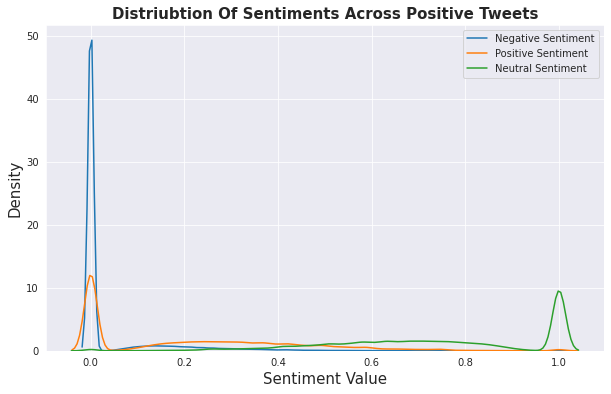

In [9]:
plt.title('Distriubtion Of Sentiments Across Positive Tweets',fontsize=15,fontweight='bold')
sns.kdeplot(pos_df['Negative Sentiment'], label='Negative Sentiment')
sns.kdeplot(pos_df['Positive Sentiment'], label='Positive Sentiment')
sns.kdeplot(pos_df['Neutral Sentiment'], label='Neutral Sentiment')
plt.ylabel('Density',fontsize=15)
plt.xlabel('Sentiment Value',fontsize=15)
plt.legend()
# ax = plt.gca()
# ax.set_ylim(bottom=0, top=15)

plt.show()

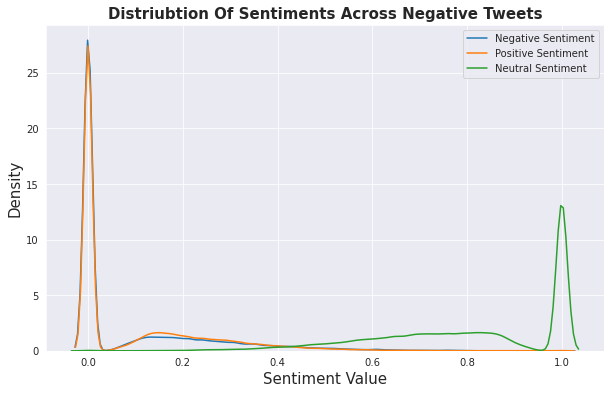

In [10]:
plt.title('Distriubtion Of Sentiments Across Negative Tweets',fontsize=15,fontweight='bold')
sns.kdeplot(neg_df['Negative Sentiment'], label='Negative Sentiment')
sns.kdeplot(neg_df['Positive Sentiment'], label='Positive Sentiment')
sns.kdeplot(neg_df['Neutral Sentiment'], label='Neutral Sentiment')
plt.ylabel('Density',fontsize=15)
plt.xlabel('Sentiment Value',fontsize=15)
plt.legend()
# ax = plt.gca()
# ax.set_ylim(bottom=0, top=15)

plt.show()

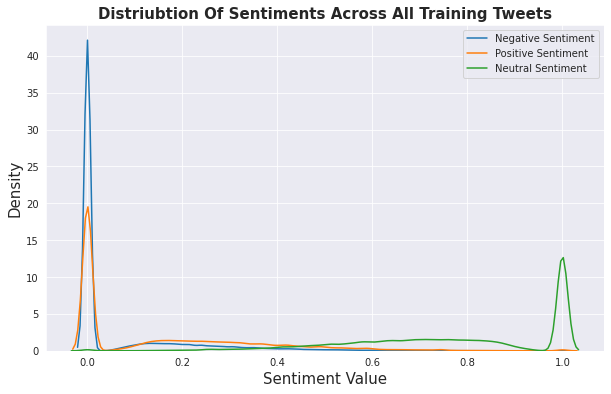

In [11]:
merged_df = pd.concat([pos_df, neg_df])
plt.title('Distriubtion Of Sentiments Across All Training Tweets',fontsize=15,fontweight='bold')
sns.kdeplot(merged_df['Negative Sentiment'], label='Negative Sentiment')
sns.kdeplot(merged_df['Positive Sentiment'], label='Positive Sentiment')
sns.kdeplot(merged_df['Neutral Sentiment'], label='Neutral Sentiment')
plt.ylabel('Density',fontsize=15)
plt.xlabel('Sentiment Value',fontsize=15)
plt.legend()
# ax = plt.gca()
# ax.set_ylim(bottom=0, top=15)

plt.show()

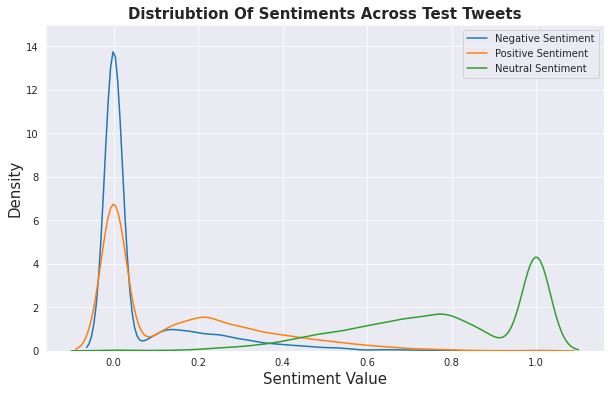

In [12]:
plt.title('Distriubtion Of Sentiments Across Test Tweets',fontsize=15,fontweight='bold')
sns.kdeplot(test_df['Negative Sentiment'], label='Negative Sentiment')
sns.kdeplot(test_df['Positive Sentiment'], label='Positive Sentiment')
sns.kdeplot(test_df['Neutral Sentiment'], label='Neutral Sentiment')
plt.ylabel('Density',fontsize=15)
plt.xlabel('Sentiment Value',fontsize=15)
plt.legend()
ax = plt.gca()
ax.set_ylim(bottom=0, top=15)

plt.show()